# 第7章: 単語ベクトル

単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．

# 60.単語ベクトルの読み込みと表示

>Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [1]:
!pip install -U --no-cache-dir gdown --pre

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [2]:
#単語ベクトルのダウンロード
import gdown

url = 'https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM'
output = 'GoogleNews-vectors-negative300.bin.gz'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
To: /content/GoogleNews-vectors-negative300.bin.gz
100%|██████████| 1.65G/1.65G [00:10<00:00, 156MB/s]


'GoogleNews-vectors-negative300.bin.gz'

【解説】

**gdown** : GoogleDrive専用のダウンローダ。

Gensimを用いて、単語ベクトルを読み込む。

In [3]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin.gz', binary=True) #Word2vecのモデルをロードする

【解説】

**Gensim** : 文書をベクトル（数値）化するオープンソースのPythonライブラリ。

**word2vec** : 単語をベクトルに変換するためのモデル。単語同士での類似度計算といった演算が可能。

In [4]:
#単語ベクトルの取得
model['United_States']

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

# 61. 単語の類似度

>“United States”と”U.S.”のコサイン類似度を計算せよ．

In [5]:
model.similarity('United_States', 'U.S.')

0.73107743

【解説】

**similarity** : 指定した2単語間のコサイン類似度を計算する。

※コサイン類似度 : 2つのベクトルがなす角のコサイン値

 →ベクトルの内積を、ベクトルの大きさ（＝L2ノルム）で割ることで計算される

# 62. 類似度の高い単語10件

>“United States”とコサイン類似度が高い10語と，その類似度を出力せよ

In [6]:
model.most_similar('United_States', topn=10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.74007248878479),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.6019070148468018)]

【解説】

most_similar : 単語を指定すると、topn番目までの類似度上位単語とその類似度を取得可能

# 63. 加法構成性によるアナロジー

>“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [7]:
model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'], topn=10)

[('Greece', 0.6898481249809265),
 ('Aristeidis_Grigoriadis', 0.5606848001480103),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400862693786621),
 ('Hrysopiyi_Devetzi', 0.5248444676399231),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166866183280945),
 ('Iraklion', 0.5146791934967041)]

【解説】

most_similar : 足すベクトル(positive)と引くベクトル(negative)をそれぞれ指定した上で、計算後のベクトルと類似度が高い単語を取得する。



# 64. アナロジーデータでの実験

>単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [8]:
#指定データのダウンロード
!wget http://download.tensorflow.org/data/questions-words.txt

--2023-01-05 14:45:53--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.141.128, 2607:f8b0:4023:c0b::80
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.141.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.002s  

2023-01-05 14:45:53 (257 MB/s) - ‘questions-words.txt’ saved [603955/603955]



In [9]:
# 先頭10行の確認
!head -10 questions-words.txt

: capital-common-countries
Athens Greece Baghdad Iraq
Athens Greece Bangkok Thailand
Athens Greece Beijing China
Athens Greece Berlin Germany
Athens Greece Bern Switzerland
Athens Greece Cairo Egypt
Athens Greece Canberra Australia
Athens Greece Hanoi Vietnam
Athens Greece Havana Cuba


このデータは、(Athens-Greece, Tokyo-Japan)のように、意味的アナロジーを評価するための組と、(walk-walks, write-writes)のように文法的アナロジーを評価する組が含まれます。 全部で以下の14のカテゴリからなり、上の5つが前者、それ以外が後者に対応しています。

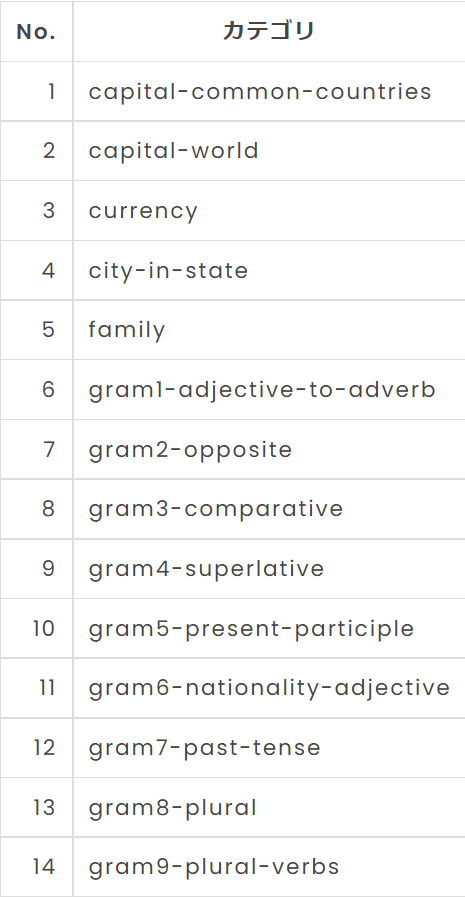

In [10]:
with open('./questions-words.txt', 'r') as f1, open('./questions-words-add.txt', 'w') as f2:
  for line in f1:  # f1から1行ずつ読込み、求めた単語と類似度を追加してf2に書込む
    line = line.split()
    if line[0] == ':':
      category = line[1]
    else:
      word, cos = model.most_similar(positive=[line[1], line[2]], negative=[line[0]], topn=1)[0]
      f2.write(' '.join([category] + line + [word, str(cos) + '\n']))

In [12]:
#出力
!head -10 questions-words-add.txt

capital-common-countries Athens Greece Baghdad Iraq Iraqi 0.6351870894432068
capital-common-countries Athens Greece Bangkok Thailand Thailand 0.7137669324874878
capital-common-countries Athens Greece Beijing China China 0.7235777974128723
capital-common-countries Athens Greece Berlin Germany Germany 0.6734622120857239
capital-common-countries Athens Greece Bern Switzerland Switzerland 0.4919748306274414
capital-common-countries Athens Greece Cairo Egypt Egypt 0.7527809739112854
capital-common-countries Athens Greece Canberra Australia Australia 0.583732545375824
capital-common-countries Athens Greece Hanoi Vietnam Viet_Nam 0.6276341676712036
capital-common-countries Athens Greece Havana Cuba Cuba 0.6460992097854614
capital-common-countries Athens Greece Helsinki Finland Finland 0.6899983882904053


# 65. アナロジータスクでの正解率

>64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

【方針】

正解率は 正解のペア(cor) / 合計数(cnt) で求められるので、1行ごとにそれぞれカウントして、最後に計算。

上記の画像の通り、文法的アナロジーはカテゴリ名に"gram"があるので条件分岐に用いる。

In [13]:
with open('./questions-words-add.txt', 'r') as f:
  sem_cnt = 0 #意味的アナロジー合計数
  sem_cor = 0 #意味的アナロジー正解数
  syn_cnt = 0 #文法的アナロジー合計数
  syn_cor = 0 #文法的アナロジー正解数
  for line in f:
    line = line.split()
    if not line[0].startswith('gram'):
      sem_cnt += 1
      if line[4] == line[5]:
        sem_cor += 1
    else:
      syn_cnt += 1
      if line[4] == line[5]:
        syn_cor += 1

print(f'意味的アナロジー正解率: {sem_cor/sem_cnt:.3f}')
print(f'文法的アナロジー正解率: {syn_cor/syn_cnt:.3f}') 

意味的アナロジー正解率: 0.731
文法的アナロジー正解率: 0.740


# 66. WordSimilarity-353での評価

>The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．



データは、単語のペアに対して人間が評価した類似度が付与されています。 それぞれのペアに対して単語ベクトルの類似度を計算し、両者のスピアマン順位相関係数を計算します。

**スピアマン順位相関係数** : 2変数間に、どの程度、順位づけの直線関係があるかを調べる際に使う分析手段。よって今回は、人間の設定した類似度の順位と単語ベクトルの類似度の順位に相関があるほど、スピアマン順位相関係数の値も高くなる。

In [14]:
!wget http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
!unzip wordsim353.zip

--2023-01-05 17:30:07--  http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving www.gabrilovich.com (www.gabrilovich.com)... 208.97.177.37
Connecting to www.gabrilovich.com (www.gabrilovich.com)|208.97.177.37|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip [following]
--2023-01-05 17:30:07--  https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving gabrilovich.com (gabrilovich.com)... 208.97.177.37
Connecting to gabrilovich.com (gabrilovich.com)|208.97.177.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23257 (23K) [application/zip]
Saving to: ‘wordsim353.zip’

wordsim353.zip      100%[===================>]  22.71K  --.-KB/s    in 0.07s   

2023-01-05 17:30:07 (330 KB/s) - ‘wordsim353.zip’ saved [23257/23257]

Archive:  wordsim353.zip
  inflating: combined.csv            
  inflating: set1.csv                
  

In [15]:
!head -10 './combined.csv'

Word 1,Word 2,Human (mean)
love,sex,6.77
tiger,cat,7.35
tiger,tiger,10.00
book,paper,7.46
computer,keyboard,7.62
computer,internet,7.58
plane,car,5.77
train,car,6.31
telephone,communication,7.50


In [16]:
ws353 = []
with open('./combined.csv', 'r') as f:
  next(f) #ヘッダをスキップ
  for line in f:  # 1行ずつ読込み、類似度を計算して追加
    line = [s.strip() for s in line.split(',')]
    line.append(model.similarity(line[0], line[1]))
    ws353.append(line)

# 確認
for i in range(5):
  print(ws353[i])

['love', 'sex', '6.77', 0.2639377]
['tiger', 'cat', '7.35', 0.5172962]
['tiger', 'tiger', '10.00', 0.99999994]
['book', 'paper', '7.46', 0.3634626]
['computer', 'keyboard', '7.62', 0.39639163]


In [17]:
import numpy as np
from scipy.stats import spearmanr

# スピアマン相関係数の計算
human = np.array(ws353).T[2] #人間の評価した類似度で1次元配列を生成
w2v = np.array(ws353).T[3]
correlation, pvalue = spearmanr(human, w2v)

print(f'スピアマン相関係数: {correlation:.3f}')

スピアマン相関係数: 0.685


# 67. k-meansクラスタリング

>国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ

**k-means** : 非階層型クラスタリング手法の１つで、データの重心を求めることでk個のクラスタに分類するアルゴリズム。


1.   クラスタの数だけ適当な点(重心の初期値)を設定する
2.   重心を元にデータをクラスタリングする
3.   各クラスの重心を再計算する
4.   2と3を変化がなくなるまで繰り返す



国名リストは単語アナロジーの評価データから収集。

In [18]:
# 国名の取得
countries = set()
with open('./questions-words-add.txt') as f:
  for line in f:
    line = line.split()
    if line[0] in ['capital-common-countries', 'capital-world']:
      countries.add(line[2])
    elif line[0] in ['currency', 'gram6-nationality-adjective']:
      countries.add(line[1])
countries = list(countries)

# 単語ベクトルの取得
countries_vec = [model[country] for country in countries]

In [19]:
from sklearn.cluster import KMeans

# k-meansクラスタリング
kmeans = KMeans(n_clusters=5)
kmeans.fit(countries_vec)
for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0] #5つあるクラスタを一つずつ指定
    print('cluster', i)
    print(', '.join([countries[k] for k in cluster]))

cluster 0
Tuvalu, Suriname, Chile, Jamaica, Guyana, Philippines, Uruguay, Honduras, Cuba, Mexico, Samoa, Bahamas, Fiji, Dominica, Argentina, Peru, Venezuela, Ecuador, Brazil, Nicaragua, Colombia, Taiwan, Belize
cluster 1
Eritrea, Zambia, Algeria, Mauritania, Malawi, Namibia, Zimbabwe, Uganda, Guinea, Sudan, Botswana, Burundi, Nigeria, Somalia, Gabon, Gambia, Kenya, Angola, Senegal, Mali, Madagascar, Ghana, Rwanda, Niger, Liberia, Mozambique
cluster 2
England, Liechtenstein, Sweden, Iceland, Finland, Canada, Korea, Greenland, France, Europe, Norway, Austria, Spain, Denmark, Australia, Portugal, Italy, Germany, Belgium, Switzerland, Netherlands, Japan, Ireland, USA
cluster 3
Romania, Lithuania, Belarus, Croatia, Kazakhstan, Macedonia, Kyrgyzstan, Albania, Russia, Estonia, Uzbekistan, Greece, Serbia, Azerbaijan, Moldova, Montenegro, Bulgaria, Turkey, Poland, Ukraine, Latvia, Armenia, Slovakia, Hungary, Cyprus, Malta, Georgia, Slovenia, Turkmenistan
cluster 4
Bahrain, Bhutan, Tunisia, Qata

【解説】

np.where：条件式のみを指定した場合は、条件に合致する要素のインデックスを示すタプルを返す

# 68. Ward法によるクラスタリング

>国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

**Ward法** : 2つのクラスターを統合する際に、クラスター内の平方和が最小となるようにクラスターを形成する手法

凝集型階層的クラスタリングとは、


1.   全ての点が別々のクラスタである状態から始めて
2.   「今あるクラスタの中で、最も距離が近い２つのクラスタを選んで１つのクラスタに合体する」という操作を
3.   目標のクラスタ数になるまで続ける

クラスタ間の距離の決め方によって最も距離が近い２つのクラスタは異なる。

Word法では２つのクラスタ C1 と C2 の間の距離は、
d(C1,C2)=L(C1∪C2)−L(C1)−L(C2)
で定義される。

L(C) は、クラスタ C 内での散らばり具合（＝重心からの距離の二乗和）

**デンドログラム** : 分析の対象となる個体がまとめられていく様を樹形図の形で表したもの。

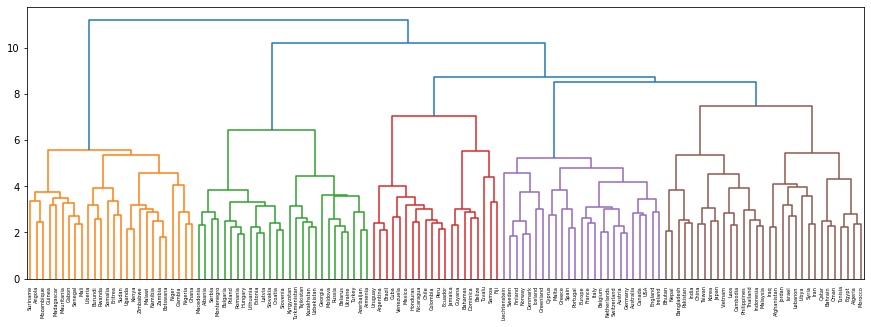

In [20]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(15, 5))
Z = linkage(countries_vec, method='ward') #ward法を適用
dendrogram(Z, labels=countries)
plt.show()

# 69. t-SNEによる可視化

>国名に関する単語ベクトルのベクトル空間をt-SNEで可視化せよ．

t-SNEで単語ベクトルを2次元に圧縮し、散布図で可視化します。

**t-SNE** : 高次元データを2次元又は3次元に変換して可視化するための次元削減アルゴリズム

In [21]:
!pip install bhtsne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.2/86.2 KB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bhtsne: filename=bhtsne-0.1.9-cp38-cp38-linux_x86_64.whl size=221025 sha256=44047c6d3b92b1ee22a7b1e9d5a76394d07e0a5c90da642fd6a483c8937bc83d
  Stored in directory: /root/.cache/pip/wheels/aa/c7/a8/6d827fea433c4238dad92d6012d1f5249e8af6e7cf020cabe1
Successfully built bhtsne


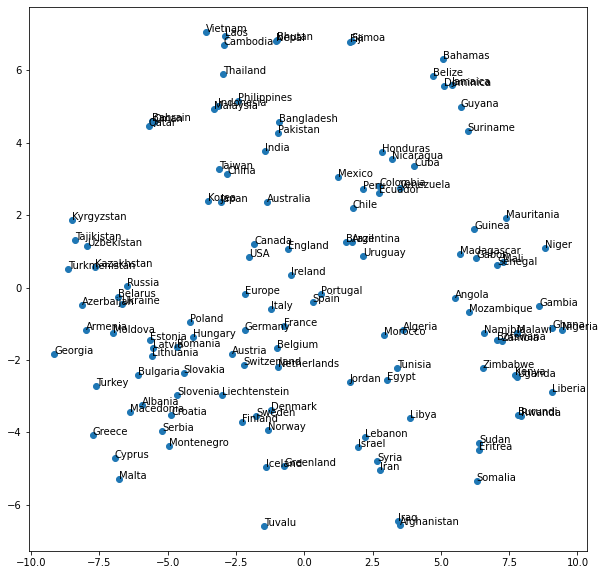

In [22]:
import bhtsne

embedded = bhtsne.tsne(np.array(countries_vec).astype(np.float64), dimensions=2, rand_seed=123) #次元圧縮
plt.figure(figsize=(10, 10))
plt.scatter(np.array(embedded).T[0], np.array(embedded).T[1]) #散布図生成
for (x, y), name in zip(embedded, countries): 
    plt.annotate(name, (x, y)) #散布図の各要素に名前を付ける
plt.show()

【解説】

**.astype(np.float64)** : 倍精度浮動小数点型に変換